In [ ]:
# !pip install numpy==1.24.2
# !pip install seaborn==0.12.2
# !pip install pandas==1.5.3
# !pip install scikit-learn==1.2.1

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import pyodbc
import numpy as np
#from ydata_profiling import ProfileReport # for EDA report

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns

# **Step 1: Load and Understand the Dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Telco-Churn.csv", sep = ',', decimal='.')

In [ ]:
df_backup = df.copy

In [ ]:
# Look at the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get the description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Get the information about null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Step 2: Preprocessing**

In [ ]:
# 'Total Charges' should be float, let's convert it to float64 type
# Using 'coerce' will replace non-convertible values with 'NaN'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Let's check for any missing data
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


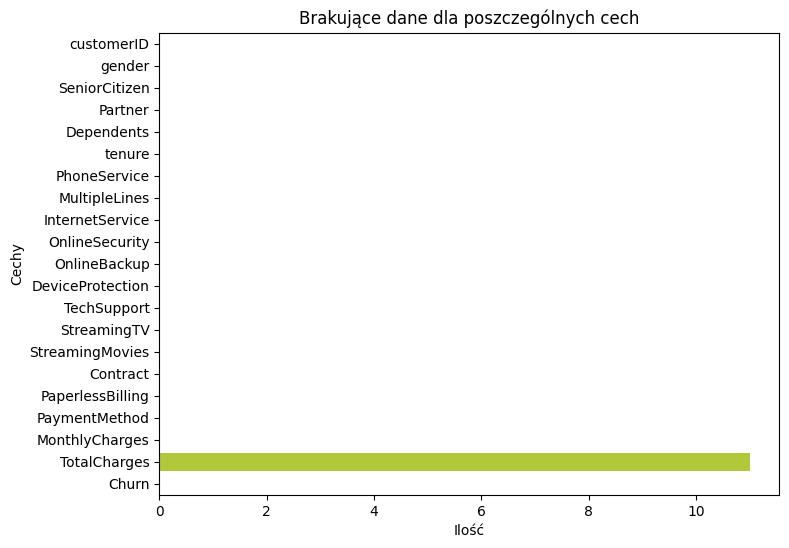

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczanie brakujących danych dla każdej kolumny
missing_data = df.isnull().sum()

# Tworzenie DataFrame z brakującymi danymi
missing_df = pd.DataFrame({'Missing Values' :missing_data})

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
barplot = sns.barplot(y=missing_df.index, x=missing_df['Missing Values'], palette='viridis')
plt.title('Brakujące dane dla poszczególnych cech')
plt.xlabel('Ilość')
plt.ylabel('Cechy')


plt.show()


In [ ]:
# Let's separate categorical and numerical columns
cat_cols = [c for c in df.columns if df[c].dtype=="object" and c != 'customerID']
num_cols = [c for c in df.columns if df[c].dtype!="object"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# Change the name of the column Churn_yes to Churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


#**Step 3: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fill in missing values in 'TotalCharges' with the mean from the training set
total_charges_mean = X_train['TotalCharges'].mean()
X_train['TotalCharges'].fillna(total_charges_mean, inplace=True)
X_test['TotalCharges'].fillna(total_charges_mean, inplace=True)

#**Step 4: Outlier Detection**

In [ ]:
# new definition of numerical columns
num_cols = []

for col in df.columns:
    if df[col].nunique() >= 3 and col != 'customerID':
        num_cols.append(col)

print(num_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# new definition of categorical columns
cat_cols = []

for col in df.columns:
    if df[col].nunique() <= 3 and col != 'customerID':
        cat_cols.append(col)

print(cat_cols)

['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']


In [ ]:
for col in num_cols:
    if col != 'customerID':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering Values between Q1-1.5*IQR and Q3+1.5*IQR
        filtered = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]

        # Print rows with outliers for each column
        outliers = df[((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
        if not outliers.empty:
            print(f"Outliers in column {col}:\n", outliers)

No outliers detected in the numerical columns


# **Step 5: Exploratory Data Analysis (EDA)**

In [ ]:
#!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport # for EDA report

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages

# profile = ProfileReport(df, title="Profiling Report",minimal=True)
# profile.to_file("EDA_report_short.html")


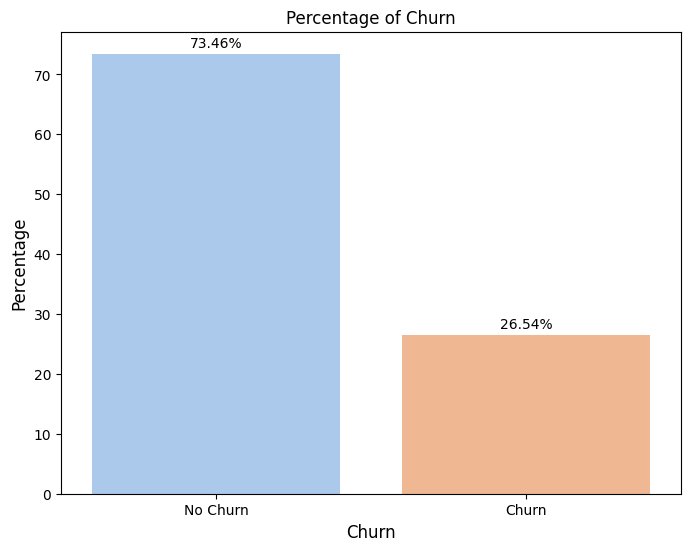

In [ ]:
# Calculate percentage of churn vs no churn
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='pastel')
plt.title('Percentage of Churn')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['No Churn', 'Churn'])

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format(height),
            ha="center")

plt.show()

#### Gender distribution

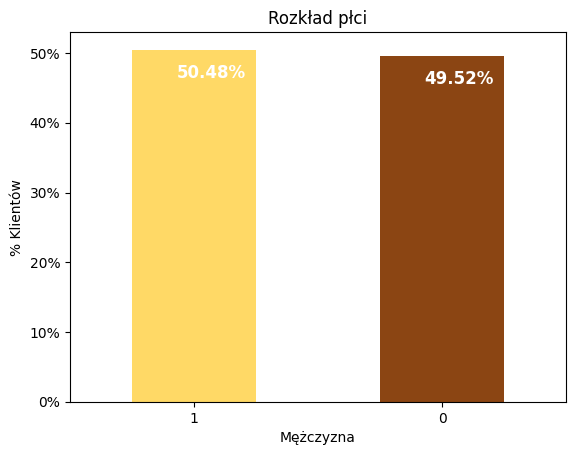

In [ ]:
import matplotlib.ticker as mtick

colors = ['#ffd966', '#8B4513']

# Tworzenie wykresu
ax = (df['gender_Male'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                      stacked=True,
                                                      rot=0,
                                                      color=colors)

# Formatowanie osi y jako procenty
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Mężczyzna')
ax.set_ylabel('% Klientów')
ax.set_title('Rozkład płci')

# Tworzenie listy do zebrania danych z obiektów plt.patches
totals = []

# Znajdowanie wartości i dodawanie do listy
for i in ax.patches:
    totals.append(i.get_height())

# Ustawianie etykiet dla indywidualnych słupków korzystając z powyższej listy
total = sum(totals)

for i in ax.patches:
    # get_x przesuwa w lewo lub w prawo; get_height przesuwa w górę lub w dół
    ax.text(i.get_x()+.18, i.get_height()-4, \
            str(round((i.get_height()/total*100), 2))+'%',
            fontsize=12,
            color='white',
            weight='bold')
plt.show()


### senior distribution

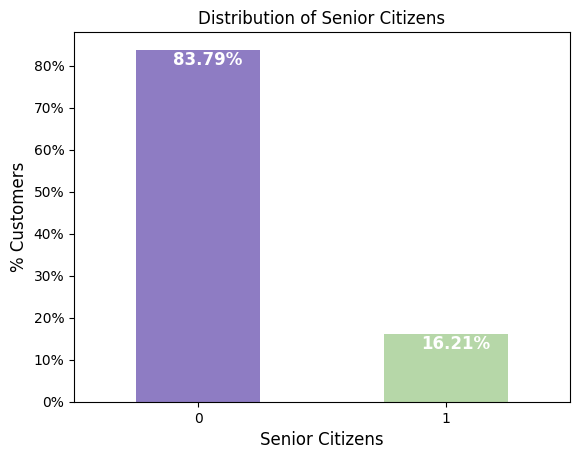

In [ ]:
colors = ['#8e7cc3', '#b6d7a8']  # Beige and brown colors
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                              stacked=True,
                                                              rot=0,
                                                              color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize=12)
ax.set_xlabel('Senior Citizens', fontsize=12)
ax.set_title('Distribution of Senior Citizens', fontsize=12)

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            "{:.2f}%".format(i.get_height()),
            fontsize=12,
            color='white',
           weight='bold')
plt.show()


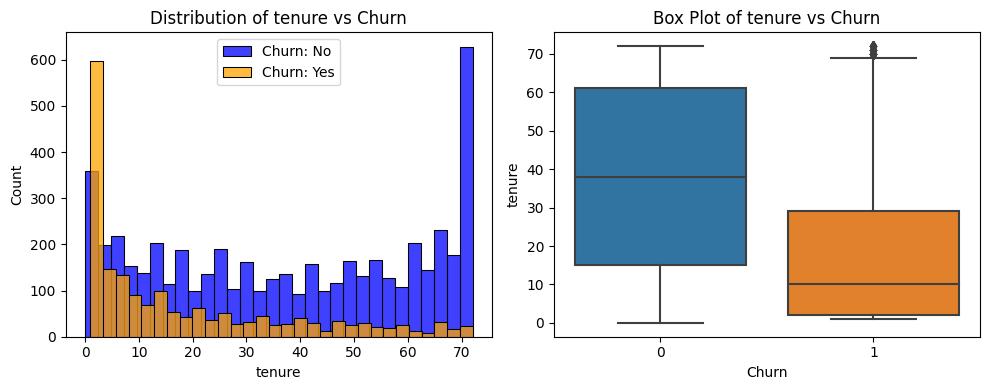

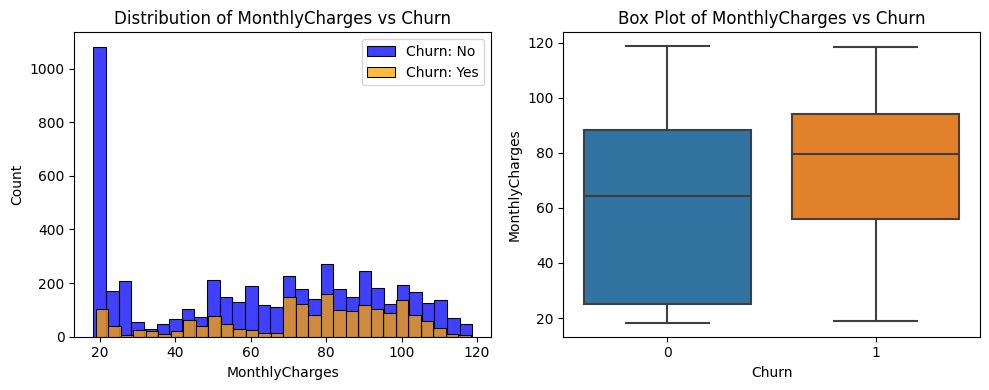

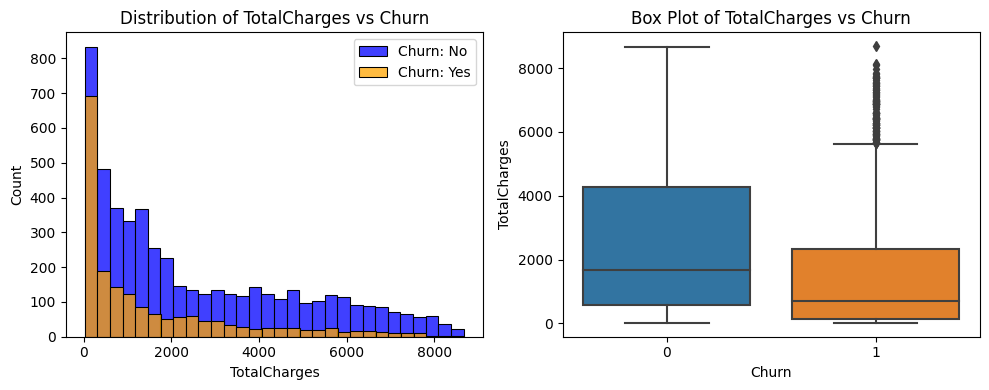

In [ ]:
# Let's plot the distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    if col != 'customerID':
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[df['Churn']==0][col], bins=30, color='blue', label='Churn: No')
        sns.histplot(df[df['Churn']==1][col], bins=30, color='orange', label='Churn: Yes')
        plt.legend()
        plt.title('Distribution of ' + col + ' vs Churn')

        plt.subplot(1, 2, 2)
        sns.boxplot(x='Churn', y=col, data=df)
        plt.title('Box Plot of ' + col + ' vs Churn')
        plt.tight_layout()
        plt.show()


<Axes: xlabel='Churn', ylabel='tenure'>

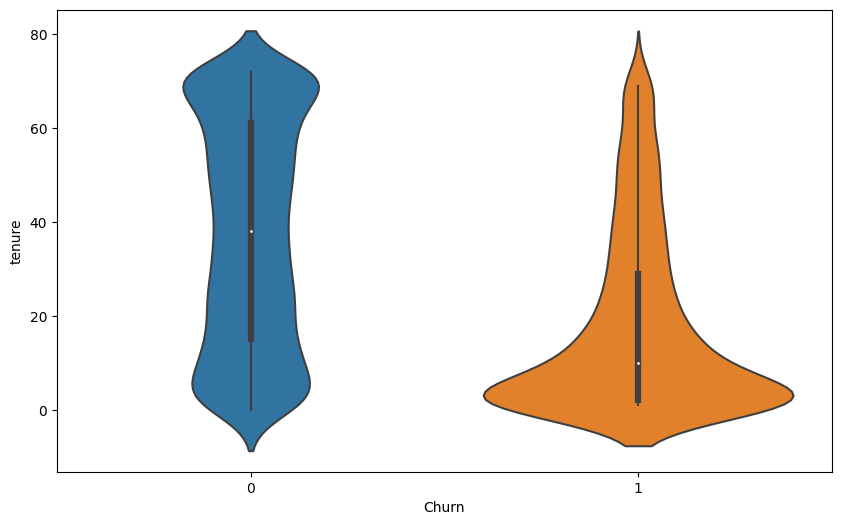

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='tenure', data=df)

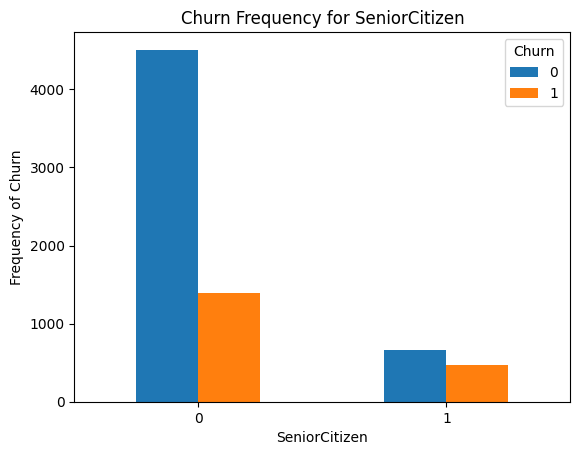

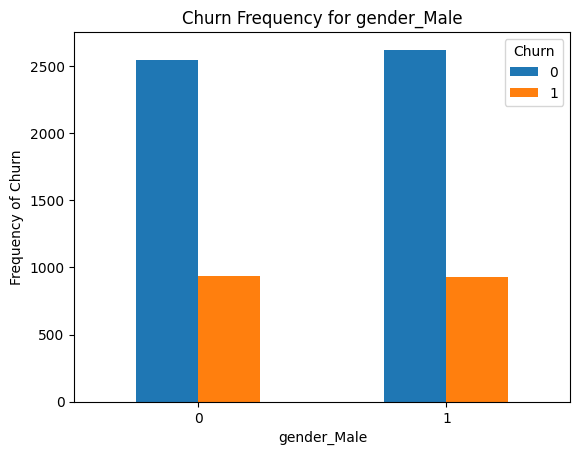

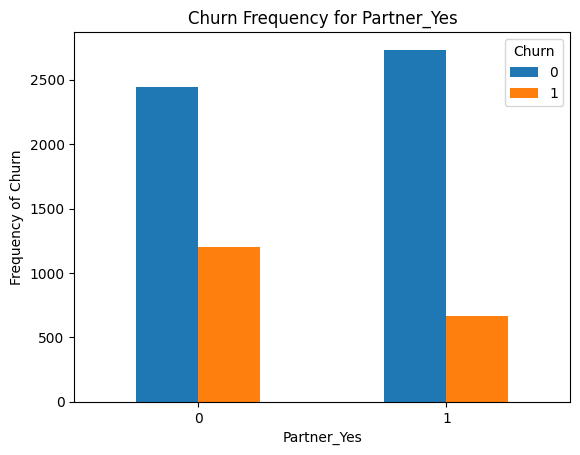

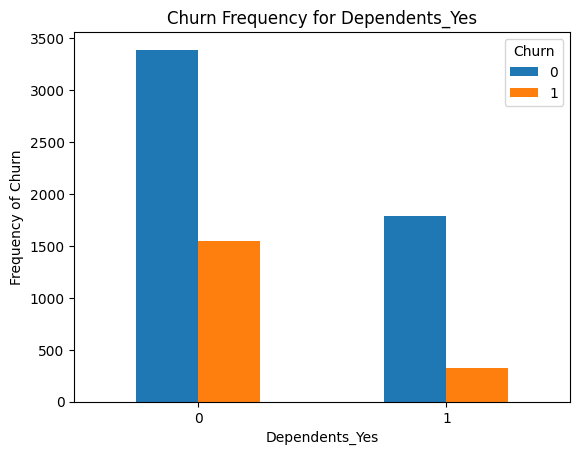

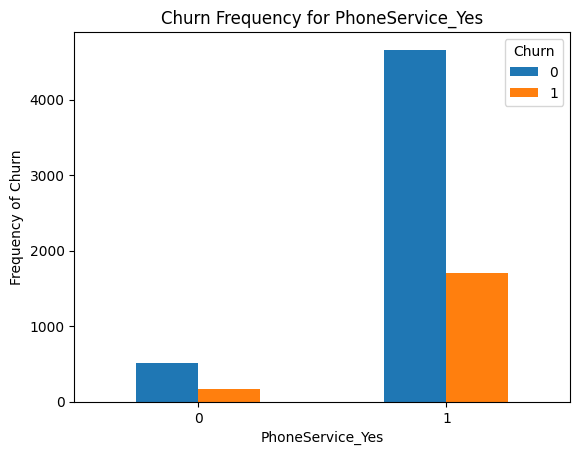

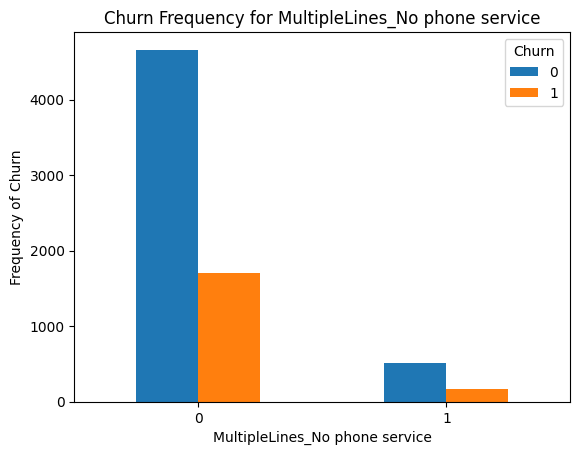

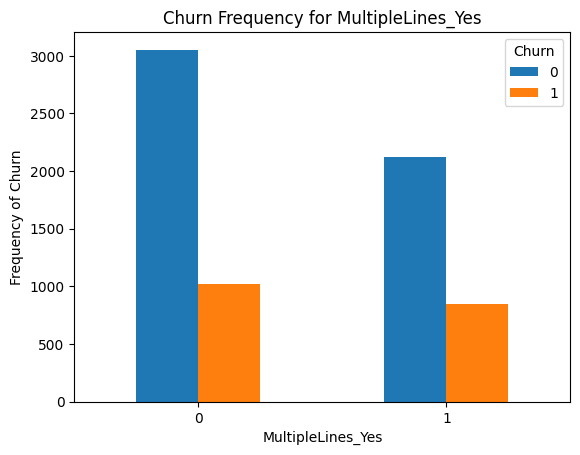

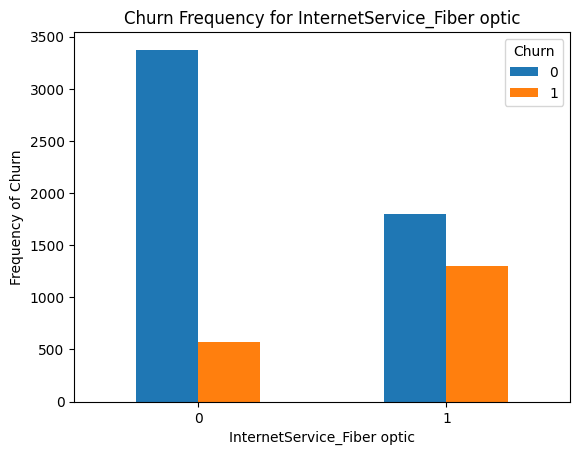

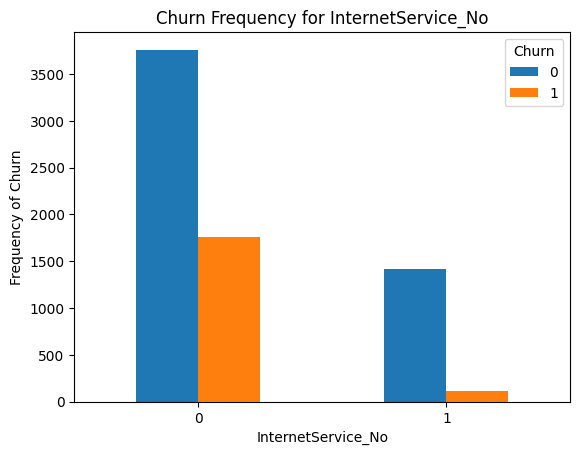

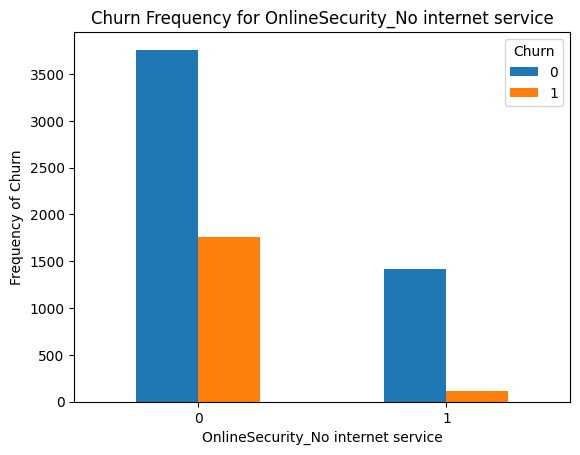

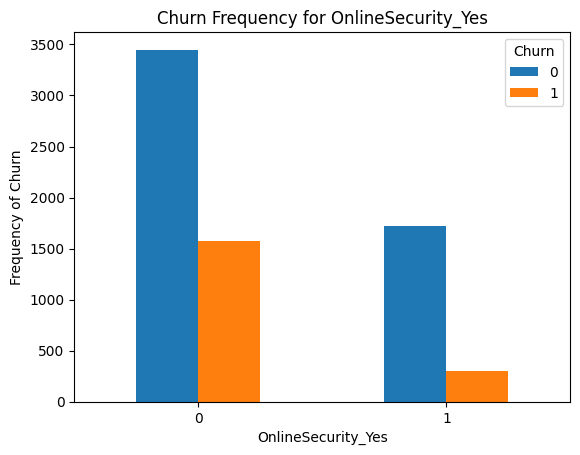

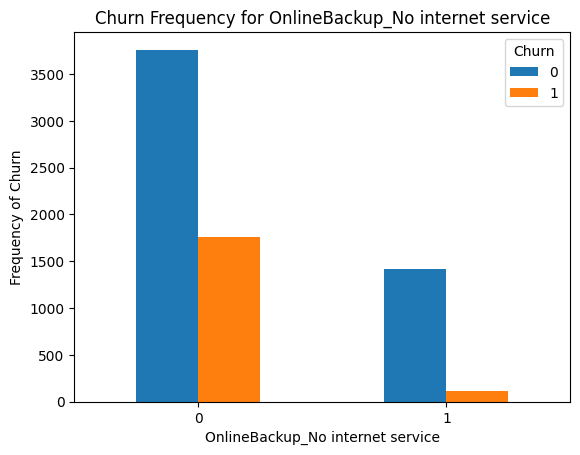

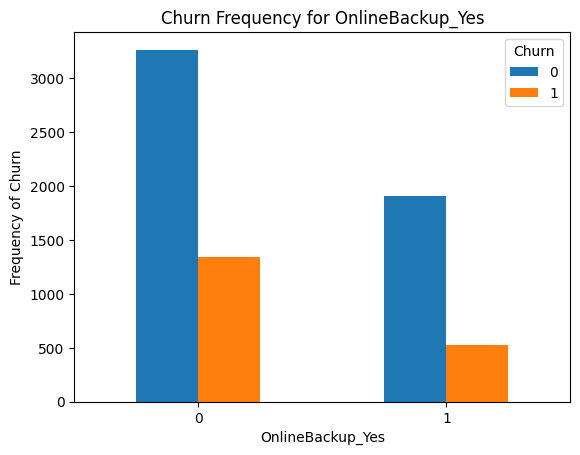

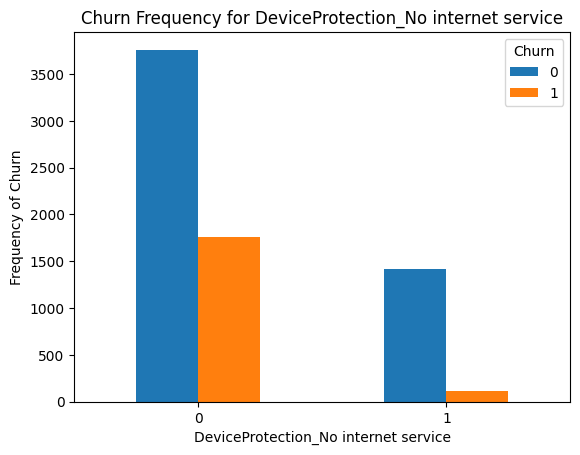

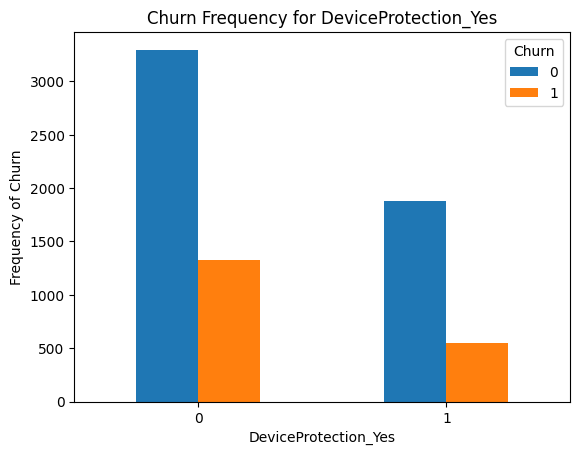

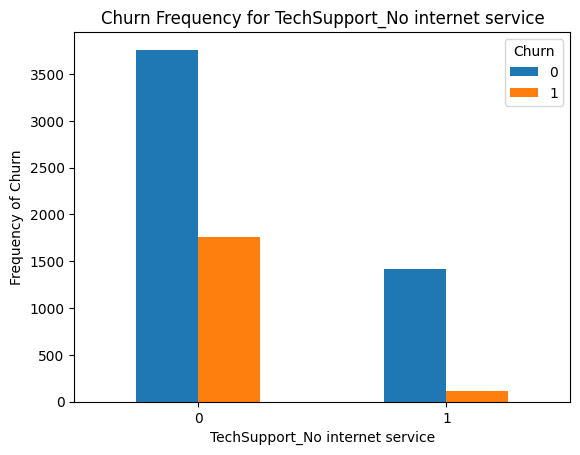

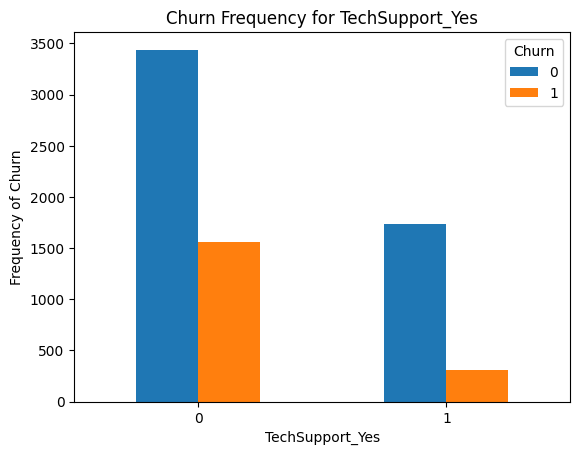

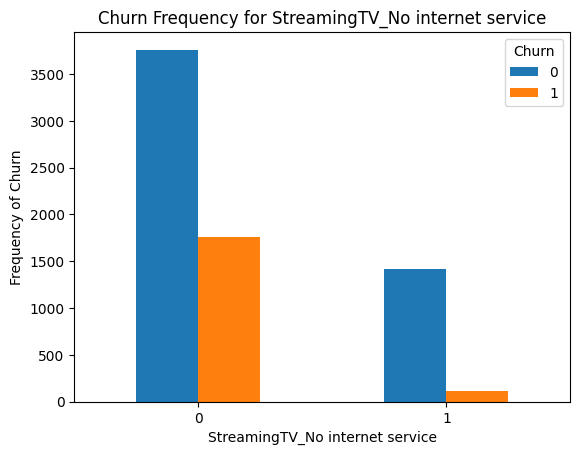

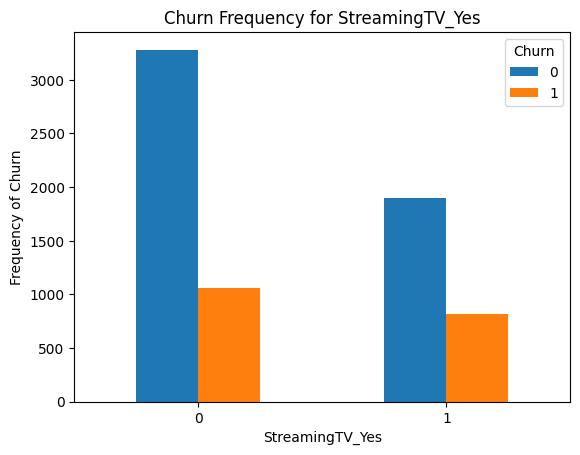

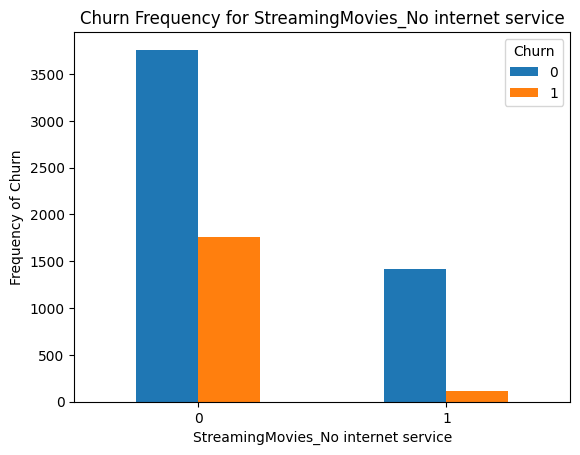

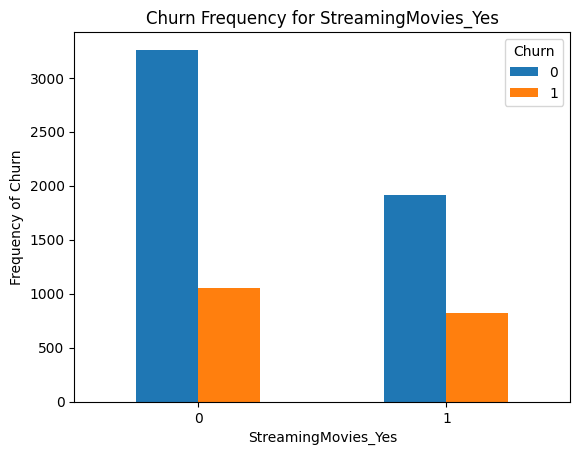

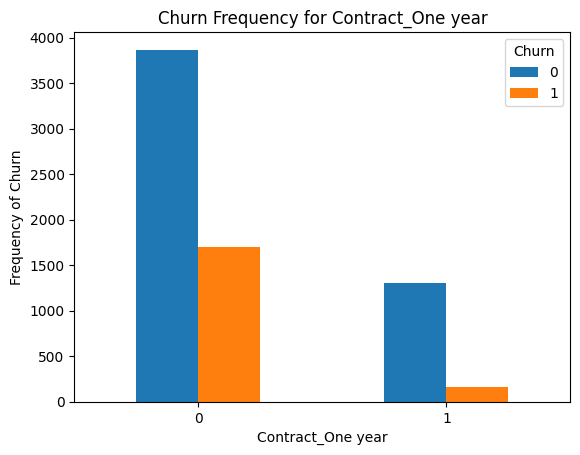

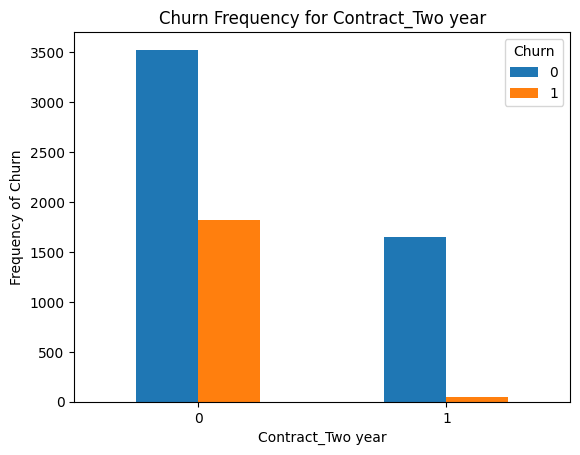

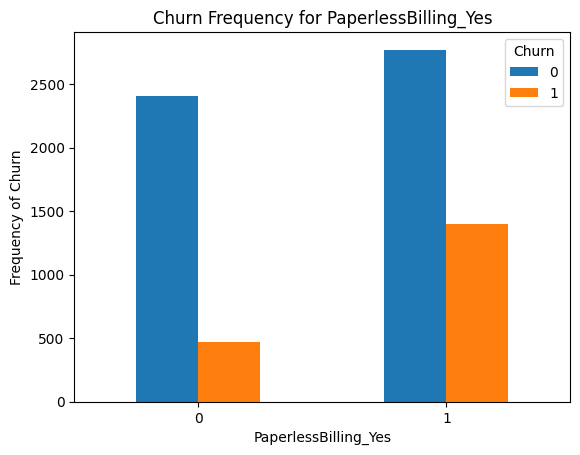

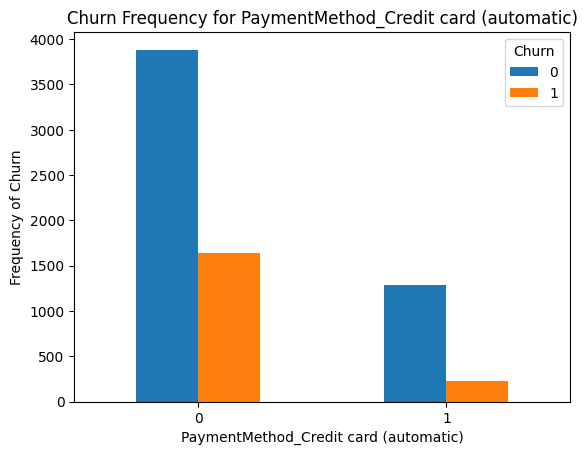

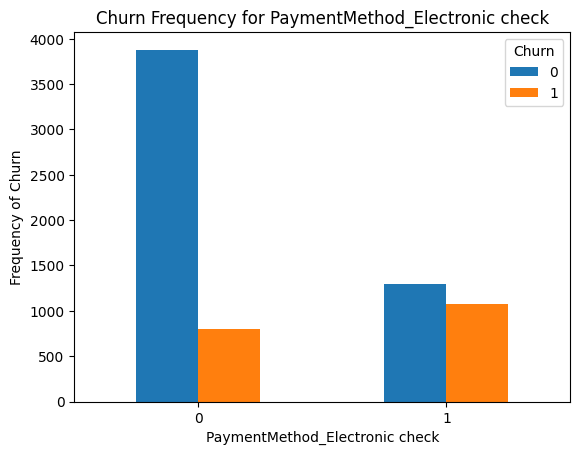

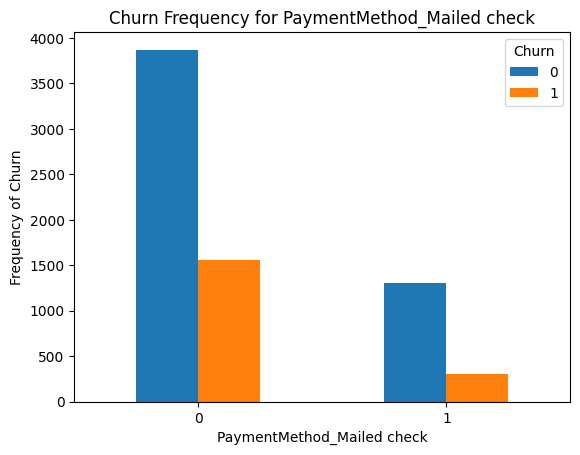

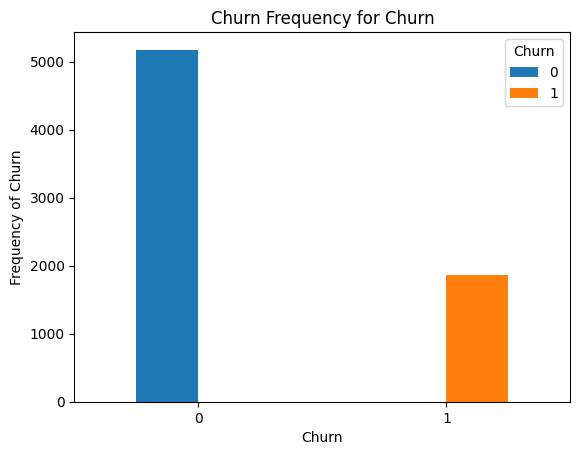

In [ ]:
# Let's plot the distribution of categorical features
for col in cat_cols:
    if col != 'customerID':
        pd.crosstab(df[col], df['Churn']).plot(kind='bar')
        plt.title('Churn Frequency for ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency of Churn')
        plt.xticks(rotation=0)  # Add this line to rotate x-axis labels to horizontal
        plt.show()

# **Step 6: Information Value (IV) and Correlation Heatmap**

<ipython-input-15-3d1845a86796>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


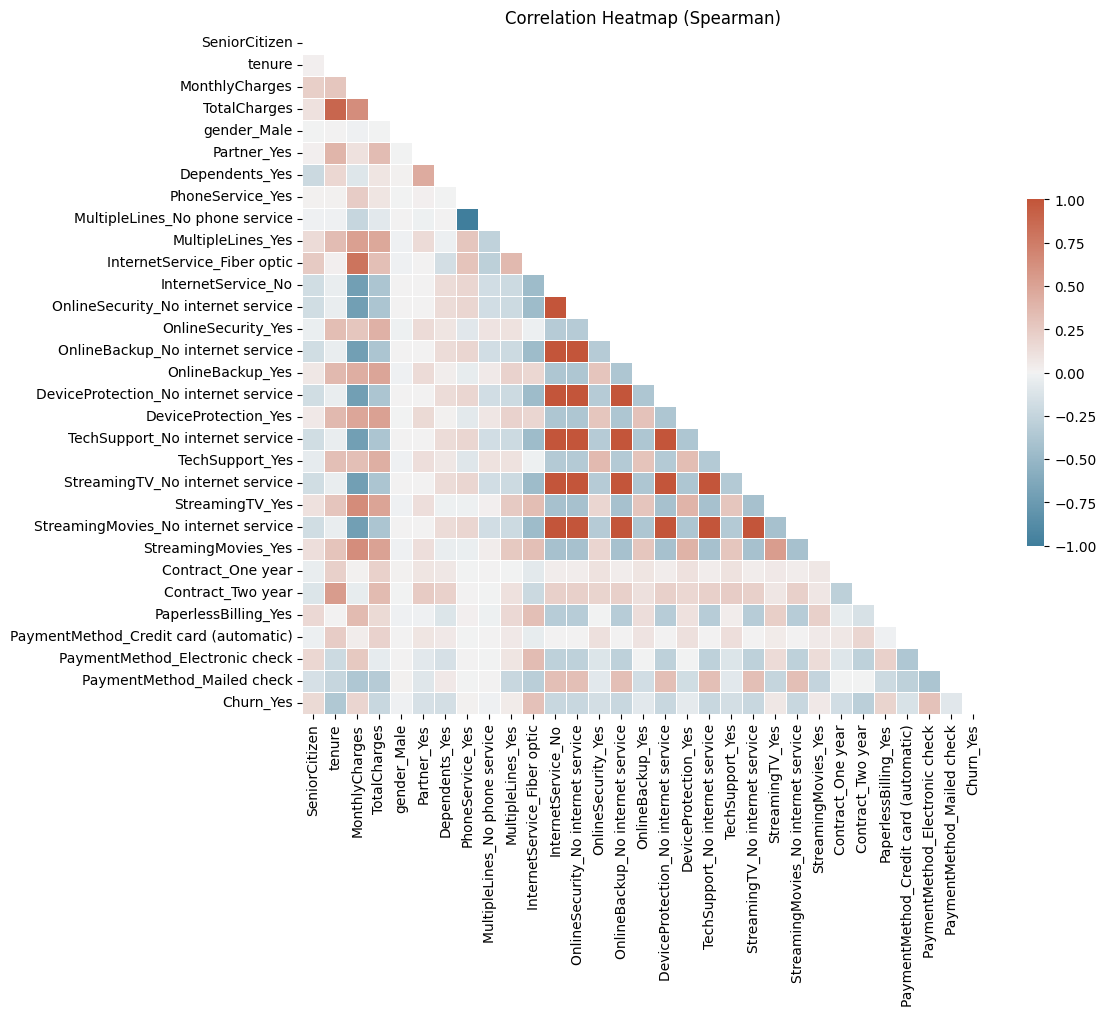

Pairs of variables with high correlation (>|0.8|):
('TotalCharges', 'tenure')
('MultipleLines_No phone service', 'PhoneService_Yes')
('InternetService_No', 'OnlineSecurity_No internet service')
('InternetService_No', 'OnlineBackup_No internet service')
('DeviceProtection_No internet service', 'InternetService_No')
('InternetService_No', 'TechSupport_No internet service')
('InternetService_No', 'StreamingTV_No internet service')
('InternetService_No', 'StreamingMovies_No internet service')
('OnlineBackup_No internet service', 'OnlineSecurity_No internet service')
('DeviceProtection_No internet service', 'OnlineSecurity_No internet service')
('OnlineSecurity_No internet service', 'TechSupport_No internet service')
('OnlineSecurity_No internet service', 'StreamingTV_No internet service')
('OnlineSecurity_No internet service', 'StreamingMovies_No internet service')
('DeviceProtection_No internet service', 'OnlineBackup_No internet service')
('OnlineBackup_No internet service', 'TechSupport

In [ ]:
# Compute the correlation matrix with Spearman method
corr = df.corr(method='spearman')

# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, exclude the correlation values from the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Heatmap (Spearman)')
plt.show()

# Find and print highly correlated pairs
highly_correlated = []
for column in corr.columns:
    for index in corr.index:
        if abs(corr.loc[index, column]) > 0.8 and index != column:
            pair = tuple(sorted((index, column)))
            if pair not in highly_correlated:
                highly_correlated.append(pair)

print("Pairs of variables with high correlation (>|0.8|):")
for pair in highly_correlated:
    print(pair)

#**Step 7: XGBoost Model**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# The split was done earlier (step 3)

# Define the xgboost model
model = XGBClassifier()

params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


best_params = {'colsample_bytree': [1.0], 'gamma': [0.0], 'learning_rate': [0.1], 'max_depth': [3], 'min_child_weight': [3]}

In [ ]:
# Execute the grid search
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3}
Best score: 0.8446154640323901


In [ ]:
# # Execute the grid search for the best selected parameters
grid_search = GridSearchCV(estimator=model, param_grid=best_params, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3}
Best score: 0.8446154640323901


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# Get feature importance
feature_importance = best_model.get_booster().get_score(importance_type='gain')

# Round the values
feature_importance = {k: round(v, 2) for k, v in feature_importance.items()}

# Sort the features by importance
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Create the plot
plt.barh(list(feature_importance.keys()), feature_importance.values(), color='g')
plt.xlabel('Gain')
plt.title('Najważniejsze zmienne według modelu XGBoost (gain)')

# Add the values next to the bars
for i, v in enumerate(feature_importance.values()):
    plt.text(v + 0.01, i, str(v), color='black', va='center')

# Add a grid
plt.grid(axis='both')

# Invert the y-axis to have the highest importance at the top
plt.gca().invert_yaxis()
plt.show()




NameError: ignored

# **Step 7a: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.8168914123491838


Axes(0.125,0.11;0.775x0.77)


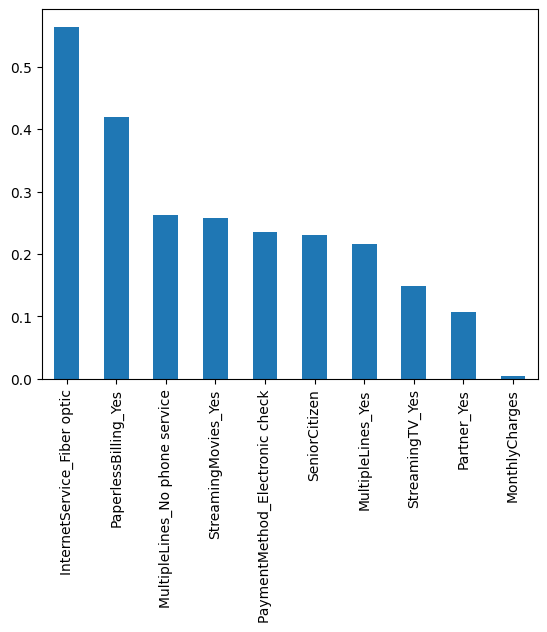

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [ ]:
# Make predictions on the test set - both "hard" predictions, and the scores (percentages)
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:,1]

# Import the metrics from sklearn
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Compute the different metrics
accuracy = accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Print the metrics
print("ROC-AUC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


ROC-AUC:  0.8603582038568632
Accuracy:  0.8168914123491838
Precision:  0.6813880126182965
Recall:  0.579088471849866
F1 Score:  0.6260869565217391


# **Step 8: Evaluation**

In [ ]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate performance metrics
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("XGBoost")
print("\nROC-AUC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

XGBoost

ROC-AUC:  0.7254106845259659
Accuracy:  0.8119233498935415
Precision:  0.6824324324324325
Recall:  0.5415549597855228
F1 Score:  0.6038863976083708
